## Importing several datasets I have scraped over the past month or so from Etsy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

etsy1 = pd.read_csv('maine_thru_arkansas_030820.csv')
etsy2 = pd.read_csv('fulloaksfhalfbrook_listings_22520.csv')
etsy3 = pd.read_csv('miami_thru_newmexico_031120.csv')
etsy4 = pd.read_csv('losangeles_thru_kentucky_032220.csv')
etsy5 = pd.read_csv('newhampshire_thru_montana_032420.csv')
dfs = [etsy1,etsy2,etsy3,etsy4,etsy5]

etsy = pd.concat(dfs)

In [2]:
etsy.head()

,Unnamed: 0,index,Description,Price,City,State,Region
0,0,0,Vintage Women's short sleeve dress with stagec...,24.00,Maine,Maine,Northeast
1,1,1,L.L. Bean Vintage Women's Fleece Pullover Jack...,34.95,Maine,Maine,Northeast
2,2,2,Vintage L.L. Bean Women’s Petite Small Red Bar...,40.00,Maine,Maine,Northeast
3,3,3,USA Vintage 80s 90s Petite 100% Pure Wool Coat...,112.00,Maine,Maine,Northeast
4,4,4,80s Floral Sweatshirt With Collar Vintage Coll...,25.20,Maine,Maine,Northeast


In [3]:
etsy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214650 entries, 0 to 31131
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   214650 non-null  int64 
 1   index        214650 non-null  int64 
 2   Description  214650 non-null  object
 3   Price        214647 non-null  object
 4   City         214650 non-null  object
 5   State        214650 non-null  object
 6   Region       214650 non-null  object
dtypes: int64(2), object(5)
memory usage: 13.1+ MB


## Reassigning column names

In [4]:
columns = ['total_index','city_index','Description','Price','City','State','Region']

etsy.columns = columns

In [5]:
etsy.head()

,total_index,city_index,Description,Price,City,State,Region
0,0,0,Vintage Women's short sleeve dress with stagec...,24.00,Maine,Maine,Northeast
1,1,1,L.L. Bean Vintage Women's Fleece Pullover Jack...,34.95,Maine,Maine,Northeast
2,2,2,Vintage L.L. Bean Women’s Petite Small Red Bar...,40.00,Maine,Maine,Northeast
3,3,3,USA Vintage 80s 90s Petite 100% Pure Wool Coat...,112.00,Maine,Maine,Northeast
4,4,4,80s Floral Sweatshirt With Collar Vintage Coll...,25.20,Maine,Maine,Northeast


In [6]:
etsy.Region.unique()

array(['Northeast', 'South', 'Midwest', 'Great Plains', 'Texas',
       'Southwest', 'Northwest', 'Northern California', 'Eastern US',
       'Southern California', 'West', 'Mid Atlantic'], dtype=object)

### Consolidating Regions

In [7]:
etsy = etsy.replace('Eastern US', 'Northeast')
etsy = etsy.replace('Mid Atlantic', 'South')

In [8]:
print(etsy.City.unique())

['Maine' 'West Virginia' 'Detroit' 'Wyoming' 'Austin' 'Tucson' 'Montana'
 'Kansas' 'Portland' 'Vermont' 'Arkansas' 'Oakland' 'San Francisco'
 'Brooklyn' 'Miami' 'Houston' 'Louisiana' 'Connecticut' 'San Diego'
 'Seattle' 'Utah' 'Minneapolis' 'Indiana' 'Maryland' 'New Mexico'
 'Los Angeles' 'Philadelphia' 'Alabama' 'Milwaukee' 'Charlotte' 'Nevada'
 'Chicago' 'Idaho' 'Nebraska' 'Atlanta' 'Kentucky' 'New Hampshire'
 'Massachusetts' 'Phoenix' 'Cincinnati' 'Iowa' 'South Dakota'
 'North Dakota' 'Denver']


In [9]:
etsy.State.unique()

array(['Maine', 'West Virginia', 'Michigan', 'Wyoming', 'Texas',
       'Arizona', 'Montana', 'Kansas', 'Oregon', 'Vermont', 'Arkansas',
       'California', 'New York', 'Florida', 'Louisiana', 'Connecticut',
       'Washington', 'Utah', 'Minnesota', 'Indiana', 'Maryland',
       'New Mexico', 'Pennsylvania', 'Alabama', 'Wisconsin',
       'North Carolina', 'Nevada', 'Illinois', 'Idaho', 'Nebraska',
       'Georgia', 'Kentucky', 'New Hampshire', 'Massachusetts', 'Ohio',
       'Iowa', 'South Dakota', 'North Dakota', 'Colorado'], dtype=object)

In [10]:
groups = etsy.groupby(['Region']).count()
groups

,total_index,city_index,Description,Price,City,State
Region,,,,,,
Great Plains,17249,17249,17249,17249,17249,17249
Midwest,34230,34230,34230,34230,34230,34230
Northeast,37459,37459,37459,37456,37459,37459
Northern California,12041,12041,12041,12041,12041,12041
Northwest,18494,18494,18494,18494,18494,18494
South,38305,38305,38305,38305,38305,38305
Southern California,14147,14147,14147,14147,14147,14147
Southwest,12030,12030,12030,12030,12030,12030
Texas,11537,11537,11537,11537,11537,11537


## Tokenization

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer

In [12]:
stopwords = stopwords.words('english')
etsytoken = etsy.copy()
#lowercase
etsytoken['lower'] = etsytoken['Description'].apply(lambda x: x.lower())
#tokenize with punctuation
etsytoken['tokenized'] = etsytoken['lower'].apply(lambda x: WordPunctTokenizer().tokenize(x))


In [13]:
#add more stopwords and make stopword removal function

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('vintage')
stopwords.append(',')
stopwords.append('/')
stopwords.append('|')
stopwords.append("'")
stopwords.append("s")
stopwords.append("//")
stopwords.append("-")
stopwords.append(";")
stopwords.append("'s")
stopwords.append('"')
stopwords.append(",")
stopwords.append(".")
stopwords.append("#")
stopwords.append("*")
stopwords.append("%")
stopwords.append('!')
stopwords.append("?")
stopwords.append("(")
stopwords.append(")")
stopwords.append("{")
stopwords.append("}")
stopwords.append("]")
stopwords.append("[")
stopwords.append("+")
stopwords.append("..")
stopwords.append("--")
stopwords.append("_")
stopwords.append("&")
stopwords.append("size")
stopwords.append("womens")
stopwords.append("women")
stopwords.append("style")
stopwords.append("•")
stopwords.append("ss")
stopwords.append("small")
stopwords.append("medium")
stopwords.append("large")
stopwords.append("s")
stopwords.append("xs")
stopwords.append("m")
stopwords.append("l")
stopwords.append("x")
def nostops(column):
    return([word for word in column if word not in stopwords])


### Stop word removal

In [14]:
etsytoken['tokenized'] = etsytoken['tokenized'].apply(lambda x: nostops(x))

In [15]:
etsytoken.tokenized.head(3)

0    [short, sleeve, dress, stagecoaches, flowers, ...
1    [bean, fleece, pullover, jacket, vtg, green, p...
2    [bean, ’, petite, red, barn, coat, thinsulate,...
Name: tokenized, dtype: object

### Making a column for description length

In [16]:
etsytoken['description_length_cleaned'] = etsytoken['tokenized'].apply(lambda x: len(x))

In [17]:
etsytoken.description_length_cleaned.head(3)

0    13
1    12
2    10
Name: description_length_cleaned, dtype: int64

### Converting price column to float

In [18]:
#convert price to float
etsytoken['Price'] = etsytoken['Price'].str.replace(',', '').astype(float)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

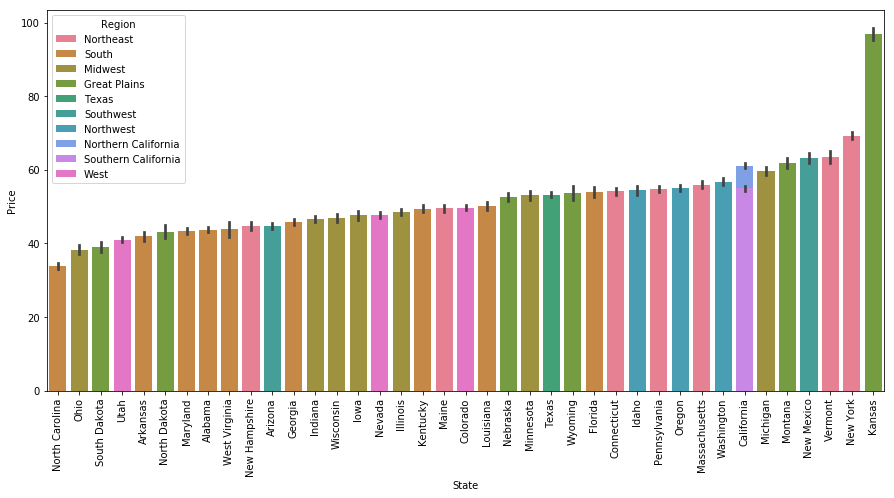

In [49]:
mask = etsytoken.Price <= 200

result = etsytoken[mask].groupby(["State"]).aggregate(np.mean).reset_index().sort_values('Price', ascending = True)

#colors = {'Midwest':'red', 'Northeast':'blue', 'Southwest':'green', 'South':'black','Midwest':'red', 'Northwest':'purple', 'Texas':'orange', 'Northern California':'yellow','Southern California':'goldenrod'}


ax = sns.barplot(x="State", y="Price", data=etsytoken[mask], order=result['State'], hue = 'Region', palette = 'husl',dodge = False)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

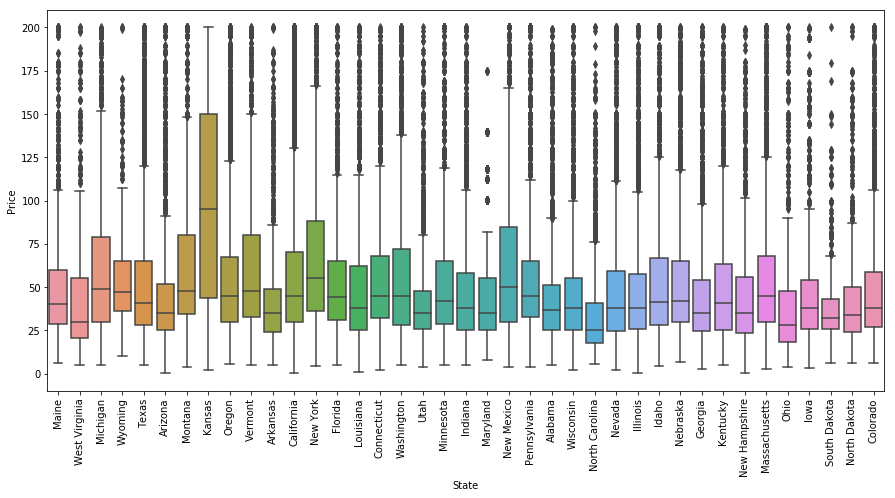

In [32]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,7)
mask = etsytoken.Price <= 200
ax = sns.boxplot(x="State", y="Price", data=result[mask], hue_order= 'Region')
plt.xticks(rotation=90)

### Dropping Kansas for this analysis based on skewed data (too many expensive band t-shirts)

In [50]:
mask = etsytoken.City != 'Kansas'
etsytoken = etsytoken.copy()[mask]

### Removing listings with only stopwords in description

In [51]:
mask = etsytoken.description_length_cleaned != 0
etsyclean = etsytoken.copy()[mask]

In [52]:
etsyclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208222 entries, 0 to 31131
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   total_index                 208222 non-null  int64  
 1   city_index                  208222 non-null  int64  
 2   Description                 208222 non-null  object 
 3   Price                       208219 non-null  float64
 4   City                        208222 non-null  object 
 5   State                       208222 non-null  object 
 6   Region                      208222 non-null  object 
 7   lower                       208222 non-null  object 
 8   tokenized                   208222 non-null  object 
 9   description_length_cleaned  208222 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 17.5+ MB


## Part of Speech Analysis to get new variables

In [54]:
etsyclean['POS_tokens'] = etsyclean['tokenized'].apply(lambda x: nltk.pos_tag(x))

In [55]:
etsyclean['POS_tokens'].head()

0    [(short, JJ), (sleeve, NN), (dress, NN), (stag...
1    [(bean, JJ), (fleece, NN), (pullover, NN), (ja...
2    [(bean, JJ), (’, NNP), (petite, NN), (red, VBD...
3    [(usa, JJ), (80s, CD), (90s, CD), (petite, JJ)...
4    [(80s, CD), (floral, JJ), (sweatshirt, NN), (c...
Name: POS_tokens, dtype: object

## Decade extraction

In [64]:
def getnumbers(column):
    x = []
    for thing in column:
        if thing[1] == 'CD':
            if thing[0][-1] == 's':
                x.append(thing[0][0:-1])
            elif thing[0][-1] == '0':
                x.append(thing[0])
    return(x)
etsyclean['decades'] = etsyclean['POS_tokens'].apply(lambda x: getnumbers(x))

In [65]:
etsyclean.decades.head(10)

0           [1940]
1             [90]
2               []
3    [80, 90, 100]
4       [80, 1980]
5          [24320]
6               []
7         [60, 70]
8             [70]
9           [1960]
Name: decades, dtype: object

#### Removing first two digits of number for consistency

In [66]:
def numbertrim(column):
    x = []
    for thing in column:
        if len(thing) == 2:
            x.append(thing)
        elif len(thing) == 4:
            x.append(thing[2:4])
    return(x)
etsyclean['decades'] = etsyclean['decades'].apply(lambda x: numbertrim(x))

In [67]:
etsyclean.decades.head(10)

0        [40]
1        [90]
2          []
3    [80, 90]
4    [80, 80]
5          []
6          []
7    [60, 70]
8        [70]
9        [60]
Name: decades, dtype: object

#### Removing duplicates in the same listing by converting to set and back to list

In [68]:
etsyclean['decades'] = etsyclean['decades'].apply(lambda x: set(x))

In [69]:
etsyclean['decades'] = etsyclean['decades'].apply(lambda x: list(x))

In [70]:
etsyclean.decades.head(10)

0        [40]
1        [90]
2          []
3    [90, 80]
4        [80]
5          []
6          []
7    [70, 60]
8        [70]
9        [60]
Name: decades, dtype: object

### A series of functions to convert the list of potential decades for each listing into separate columns

In [72]:
def aughts(column):
    value = 0
    for thing in column:
        if thing == '00':
            value = value + 1
        else:
            value = value + 0
    return(value)
etsyclean['aughts'] = etsyclean['decades'].apply(lambda x: aughts(x))

def tens(column):
    value = 0
    for thing in column:
        if thing == '10':
            value = value + 1
        else:
            value = value + 0
    return(value)
etsyclean['tens'] = etsyclean['decades'].apply(lambda x: tens(x))

def twenties(column):
    value = 0
    for thing in column:
        if thing == '20':
            value = value + 1
        else:
            value = value + 0
    return(value)
etsyclean['twenties'] = etsyclean['decades'].apply(lambda x: twenties(x))

def thirties(column):
    value = 0
    for thing in column:
        if thing == '30':
            value = value + 1
        else:
            value = value + 0
    return(value)
etsyclean['thirties'] = etsyclean['decades'].apply(lambda x: thirties(x))

def forties(column):
    value = 0
    for thing in column:
        if thing == '40':
            value = value + 1
        else:
            value = value + 0
    return(value)
etsyclean['forties'] = etsyclean['decades'].apply(lambda x: forties(x))

def fifties(column):
    value = 0
    for thing in column:
        if thing == '50':
            value = value + 1
        else:
            value = value + 0
    return(value)
etsyclean['fifties'] = etsyclean['decades'].apply(lambda x: fifties(x))

def sixties(column):
    value = 0
    for thing in column:
        if thing == '60':
            value = value + 1
        else:
            value = value + 0
    return(value)
etsyclean['sixties'] = etsyclean['decades'].apply(lambda x: sixties(x))

def seventies(column):
    value = 0
    for thing in column:
        if thing == '70':
            value = value + 1
        else:
            value = value + 0
    return(value)
etsyclean['seventies'] = etsyclean['decades'].apply(lambda x: seventies(x))

def eighties(column):
    value = 0
    for thing in column:
        if thing == '80':
            value = value + 1
        else:
            value = value + 0
    return(value)
etsyclean['eighties'] = etsyclean['decades'].apply(lambda x: eighties(x))

def nineties(column):
    value = 0
    for thing in column:
        if thing == '90':
            value = value + 1
        else:
            value = value + 0
    return(value)
etsyclean['nineties'] = etsyclean['decades'].apply(lambda x: nineties(x))

In [73]:
etsyclean.head(3)

,total_index,city_index,Description,Price,City,State,Region,lower,tokenized,description_length_cleaned,...,aughts,tens,twenties,thirties,forties,fifties,sixties,seventies,eighties,nineties
0,0,0,Vintage Women's short sleeve dress with stagec...,24.00,Maine,Maine,Northeast,vintage women's short sleeve dress with stagec...,"[short, sleeve, dress, stagecoaches, flowers, ...",13,...,0,0,0,0,1,0,0,0,0,0
1,1,1,L.L. Bean Vintage Women's Fleece Pullover Jack...,34.95,Maine,Maine,Northeast,l.l. bean vintage women's fleece pullover jack...,"[bean, fleece, pullover, jacket, vtg, green, p...",12,...,0,0,0,0,0,0,0,0,0,1
2,2,2,Vintage L.L. Bean Women’s Petite Small Red Bar...,40.00,Maine,Maine,Northeast,vintage l.l. bean women’s petite small red bar...,"[bean, ’, petite, red, barn, coat, thinsulate,...",10,...,0,0,0,0,0,0,0,0,0,0


In [74]:
etsyclean.columns

Index(['total_index', 'city_index', 'Description', 'Price', 'City', 'State',
       'Region', 'lower', 'tokenized', 'description_length_cleaned',
       'POS_tokens', 'decades', 'aughts', 'tens', 'twenties', 'thirties',
       'forties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties'],
      dtype='object')

### Taking a look at decade distribution

Text(0.5,1,'Percent of listings with Decade by Region')

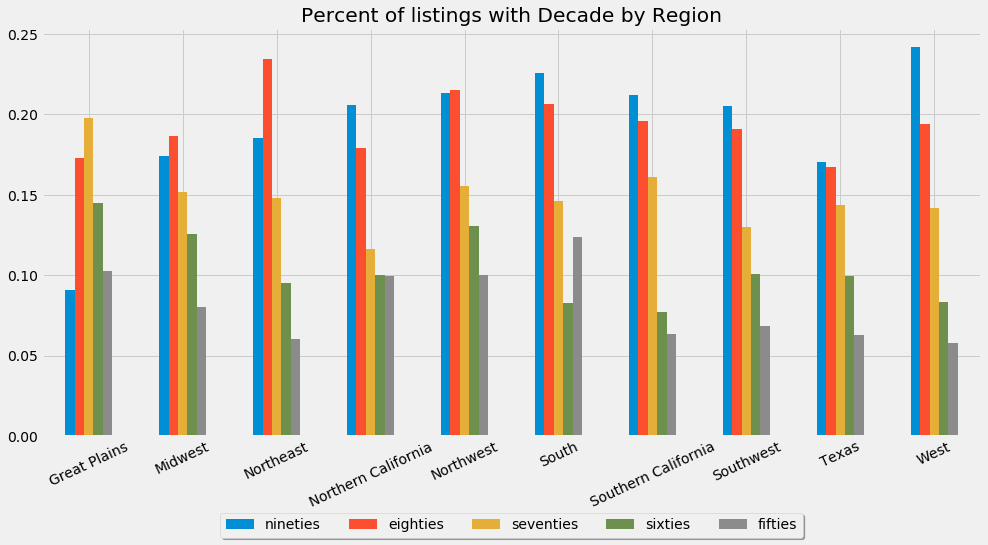

In [114]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
plt.style.use('fivethirtyeight')
graphcols = ['Region','nineties','eighties','seventies','sixties','fifties']
ax = etsyclean[graphcols].groupby(['Region']).mean().plot.bar()
ax.legend(loc='upper center', bbox_to_anchor=(.5, -.17), shadow=True, ncol=5)
plt.xticks(rotation=25)
ax.set_title('Percent of listings with Decade by Region')

Text(0.5,1,'Percent of listings with Decade by Region')

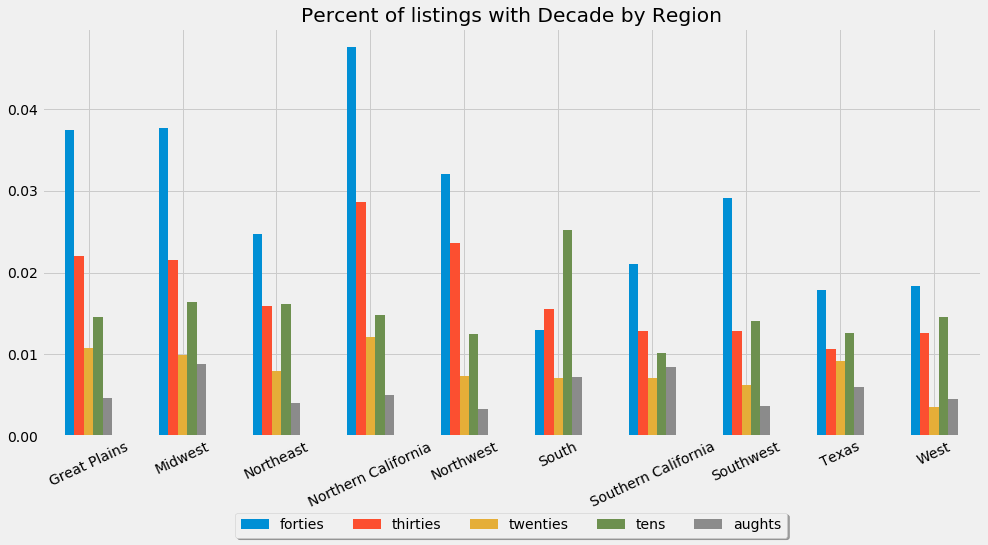

In [115]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
plt.style.use('fivethirtyeight')
graphcols = ['Region','forties','thirties','twenties','tens','aughts']
ax = etsyclean[graphcols].groupby(['Region']).mean().plot.bar()
ax.legend(loc='upper center', bbox_to_anchor=(.5, -.17), shadow=True, ncol=5)
plt.xticks(rotation=25)
ax.set_title('Percent of listings with Decade by Region')

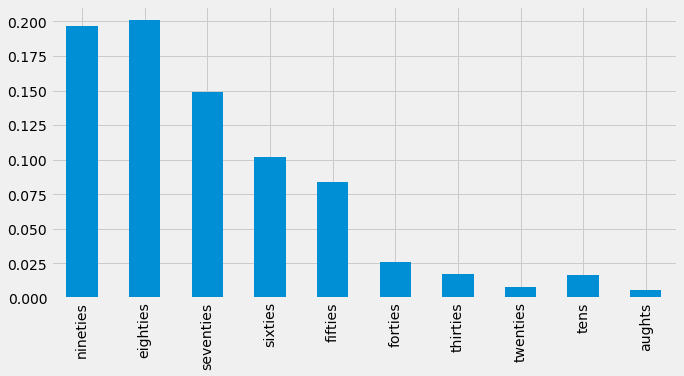

In [129]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
plt.style.use('fivethirtyeight')
graphcols = ['nineties','eighties','seventies','sixties','fifties','forties','thirties','twenties','tens','aughts']
etsyclean[graphcols].mean().plot.bar()

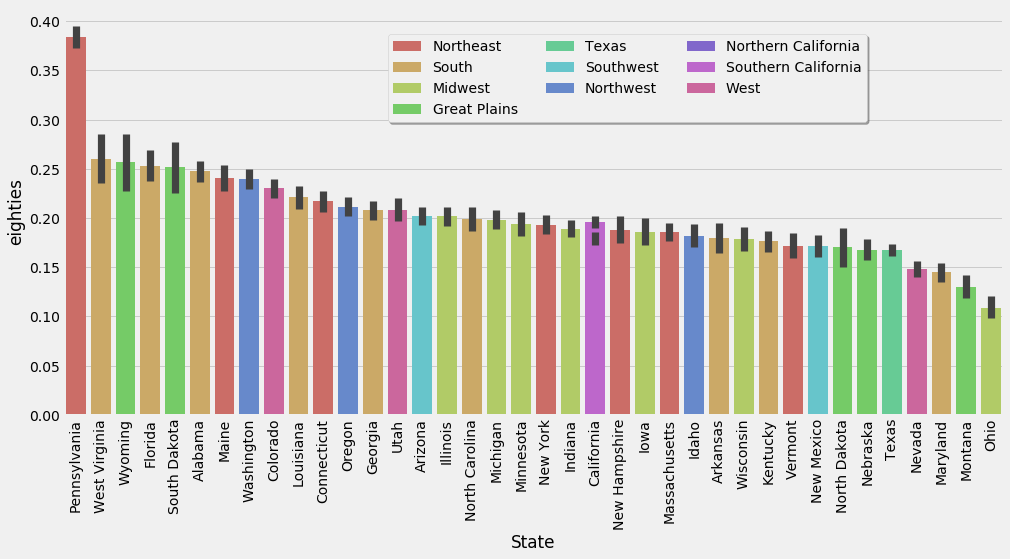

In [124]:
result = etsyclean.groupby(["State"])['eighties'].aggregate(np.mean).reset_index().sort_values('eighties', ascending = False)

ax = sns.barplot(x="State", y="eighties", data=etsyclean, order=result['State'] ,hue = 'Region', palette = 'hls',dodge = False)
plt.xticks(rotation=90)
ax.legend(loc='upper center', bbox_to_anchor=(.6, .95), shadow=True, ncol=3)

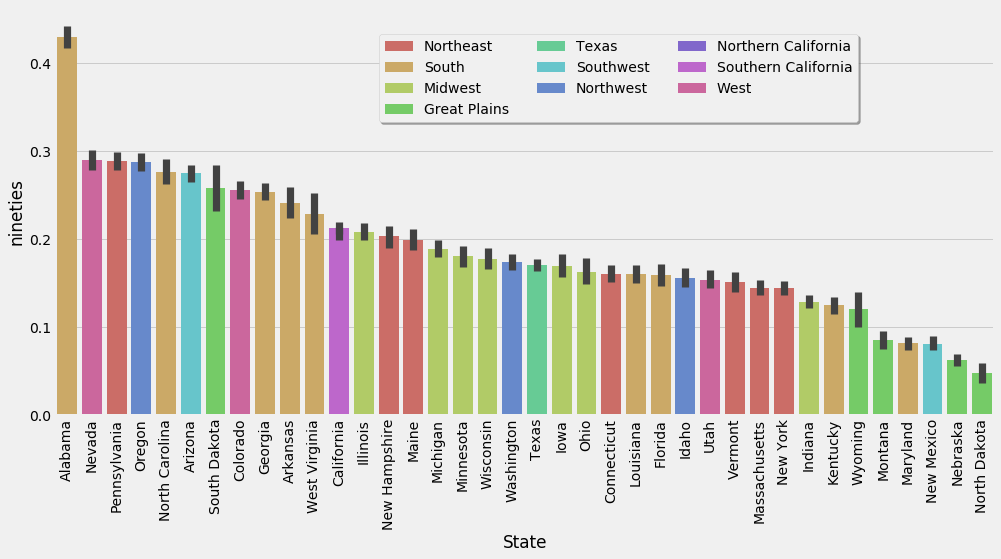

In [125]:
result = etsyclean.groupby(["State"])['nineties'].aggregate(np.mean).reset_index().sort_values('nineties', ascending = False)

ax = sns.barplot(x="State", y="nineties", data=etsyclean, order=result['State'] ,hue = 'Region', palette = 'hls',dodge = False)
plt.xticks(rotation=90)
ax.legend(loc='upper center', bbox_to_anchor=(.6, .95), shadow=True, ncol=3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

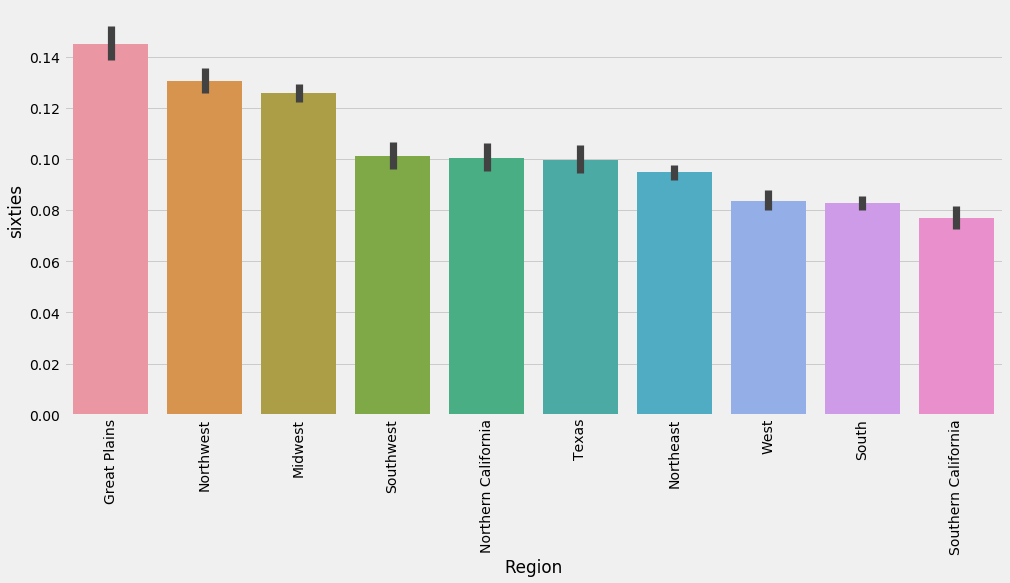

In [128]:
result = etsyclean.groupby(["Region"])['sixties'].aggregate(np.mean).reset_index().sort_values('sixties', ascending = False)

ax = sns.barplot(x="Region", y="sixties", data=etsyclean, order=result['Region'] )
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

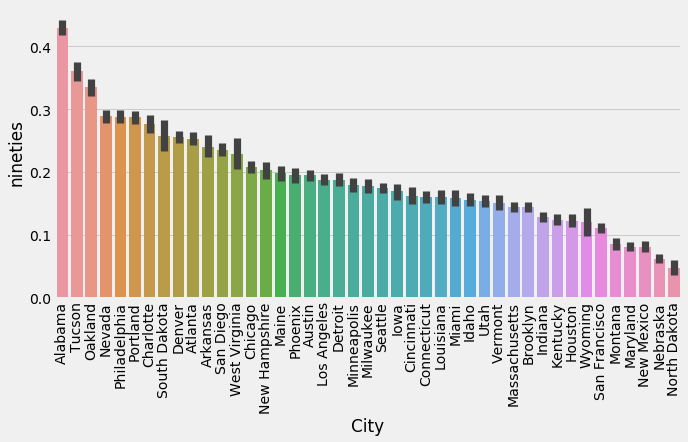

In [130]:
result = etsyclean.groupby(["City"])['nineties'].aggregate(np.mean).reset_index().sort_values('nineties', ascending = False)

ax = sns.barplot(x="City", y="nineties", data=etsyclean, order=result['City'] )
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

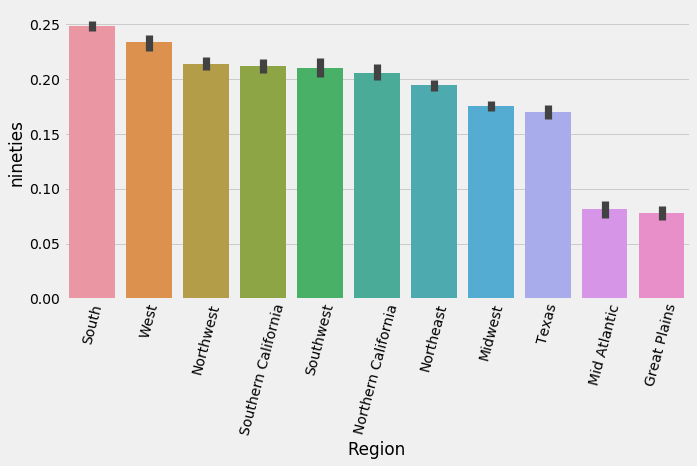

In [193]:
result = etsyclean.groupby(["Region"])['nineties'].aggregate(np.mean).reset_index().sort_values('nineties', ascending = False)

ax = sns.barplot(x="Region", y="nineties", data=etsyclean, order=result['Region'] )
plt.xticks(rotation=75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

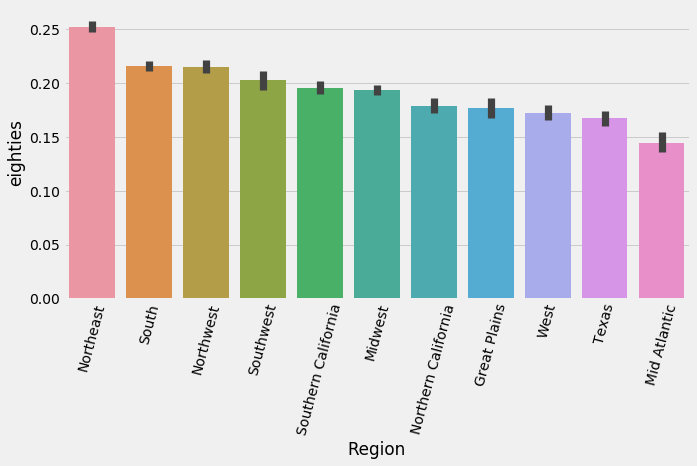

In [194]:
result = etsyclean.groupby(["Region"])['eighties'].aggregate(np.mean).reset_index().sort_values('eighties', ascending = False)

ax = sns.barplot(x="Region", y="eighties", data=etsyclean, order=result['Region'] )
plt.xticks(rotation=75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

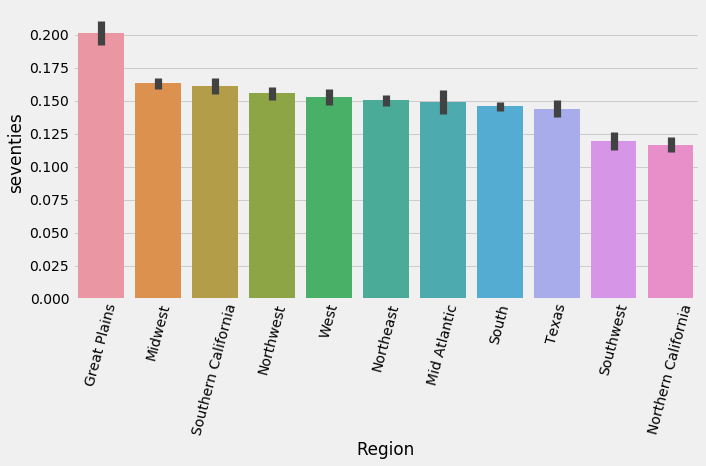

In [195]:
result = etsyclean.groupby(["Region"])['seventies'].aggregate(np.mean).reset_index().sort_values('seventies', ascending = False)

ax = sns.barplot(x="Region", y="seventies", data=etsyclean, order=result['Region'] )
plt.xticks(rotation=75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

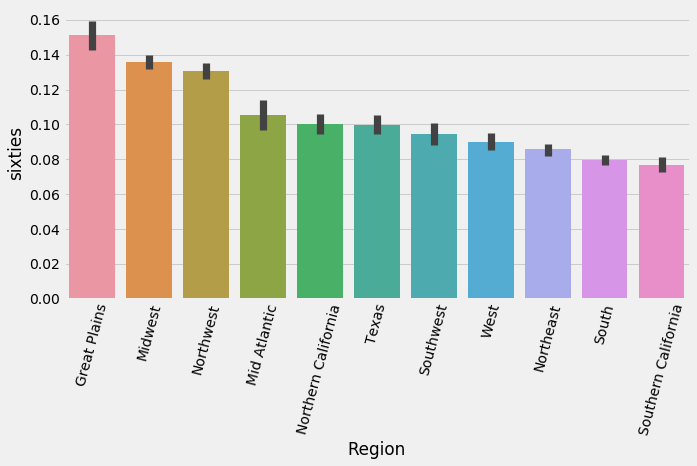

In [99]:
result = etsyclean.groupby(["Region"])['sixties'].aggregate(np.mean).reset_index().sort_values('sixties', ascending = False)

ax = sns.barplot(x="Region", y="sixties", data=etsyclean, order=result['Region'] )
plt.xticks(rotation=75)

# Clustering

In [131]:
import gensim
from gensim.models import Word2Vec

m = Word2Vec(etsyclean.tokenized, size = 50, min_count = 1, sg =1)
print(m)

Word2Vec(vocab=37746, size=50, alpha=0.025)


In [132]:
word_vectors = m.wv

In [133]:
def vectorizer(desc, m):
    vec =[]
    numw = 0
    for w in desc:
        try:
            if numw == 0:
                vec = m[w]
            else:
                vec = np.add(vec, m[w])
            numw += 1
        except:
            pass
    
    return(np.asarray(vec)/numw)
l =[]

descriptions = etsyclean.tokenized
for i in descriptions:
    l.append(vectorizer(i,m))
SZ=np.array(l)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [134]:
len(SZ)

208222

In [137]:
from sklearn.cluster import KMeans
from sklearn import cluster

wcss = [] 
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 122)
    kmeans.fit(SZ)
    wcss.append(kmeans.inertia_)


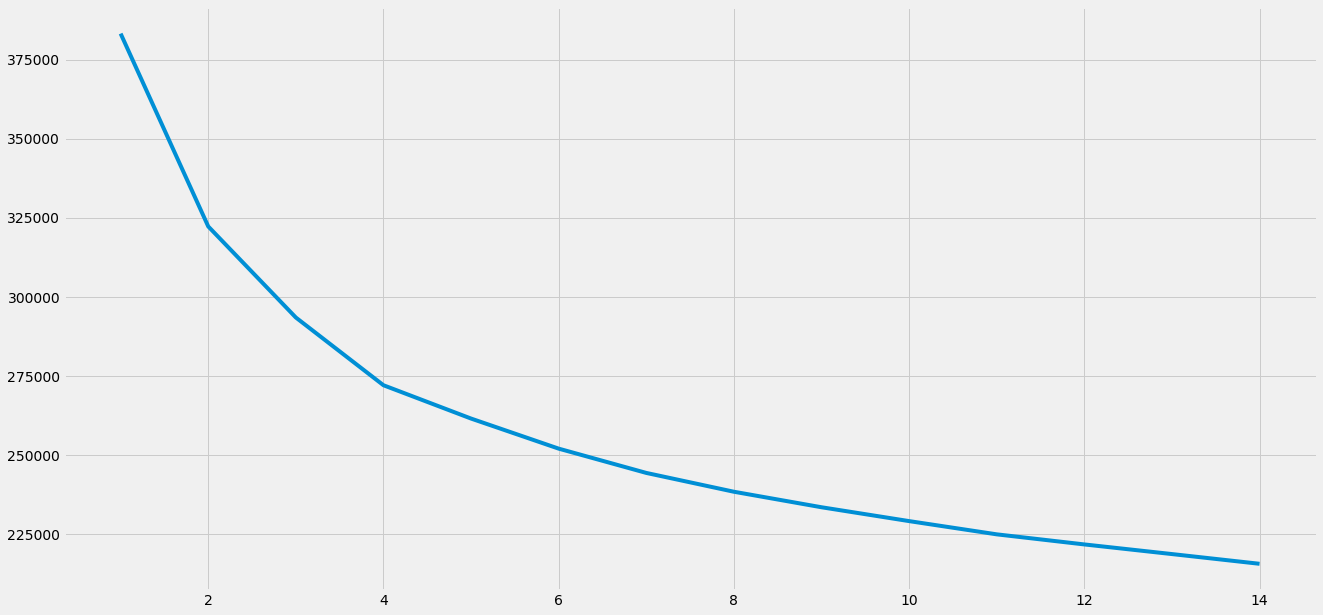

In [139]:
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(range(1,15),wcss)
plt.show()

In [140]:
n_clusters = 7
clf = KMeans(n_clusters =n_clusters,
             max_iter = 100,
             init = 'k-means++',
             n_init =1)
labels = clf.fit_predict(SZ)
#print(labels)
#for index, description in enumerate(descriptions):
   # print(str(labels[index]) + ":" + str(description))
            
            

In [141]:
etsyclean['vector'] = SZ.tolist()

In [142]:
etsyclean['seven_cluster_assign'] = labels

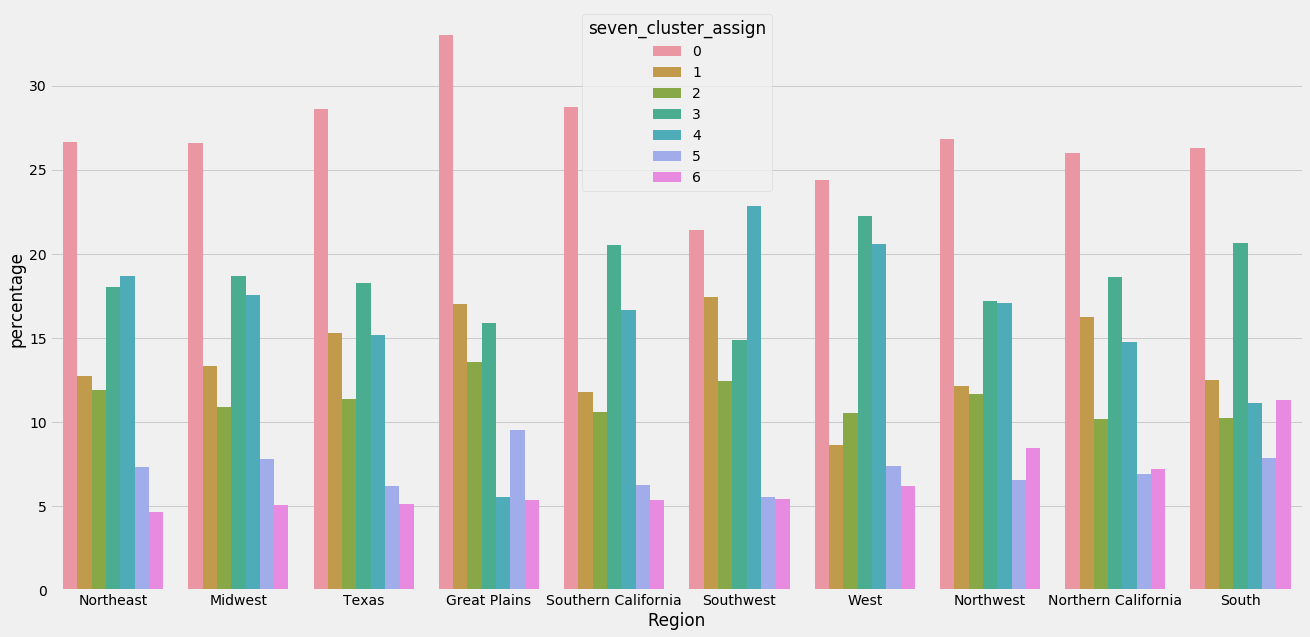

In [145]:
p = sns.barplot(x="Region", y="percentage", hue="seven_cluster_assign", data=cluster_percents)
#plt.xticks(rotation=75)

# Investigate and sub-cluster first cluster

In [147]:
mask = etsyclean.seven_cluster_assign == 0 
etsyclean.tokenized[mask].head(10)

0     [short, sleeve, dress, stagecoaches, flowers, ...
12    [1970, striped, velour, surplice, neckline, sw...
15    [1970s, jessica, ’, gunnies, prairie, skirt, f...
22    [1970, peggy, jennings, pale, pink, silk, 3, p...
36    [1940, navy, rayon, dress, celluloid, carved, ...
40    [purple, jumpsuit, ruffled, polyester, pantsui...
43    [pendleton, green, amp, fuscia, wool, plaid, p...
44    [1970, meadowbank, floral, maxi, wrap, skirt, ...
47    [filipino, tunic, blouse, embroidered, tunic, ...
56                  [pink, floral, shift, dress, 1960s]
Name: tokenized, dtype: object

## looks like this cluster is dresses

In [150]:
mask = etsyclean.seven_cluster_assign == 0 

cluster0 = etsyclean[mask].copy()

top_word_list_0 = []
for row in cluster0.tokenized:
    top_word_list_0 = top_word_list_0 + row

In [149]:
from nltk.probability import FreqDist

fdist = FreqDist(top_word_list_0)
fdist = pd.Series(fdist, name='Frequency')
fdist.index.name = 'word'
fdist = fdist.reset_index()
fdist = pd.DataFrame(data=fdist)

fdist_sort = fdist.sort_values(['Frequency'], ascending = False)
fdist_sort.reset_index(drop=True, inplace=True)

fdist_sort.head(25)


,word,Frequency
0,dress,60410
1,skirt,20660
2,floral,13873
3,print,9238
4,black,8973
5,blue,7861
6,70s,7849
7,maxi,7179
8,white,6829
9,60s,6124


## Re-clustering to get sub clusters within the dress group

In [151]:
SZ1 = cluster0['vector'].to_numpy()

In [153]:
vectors = []
for thing in SZ1:
    thing = np.asarray(thing)
    vectors.append(thing)

In [154]:
wcss = [] 
for i in range(3,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 122)
    kmeans.fit(vectors)
    wcss.append(kmeans.inertia_)

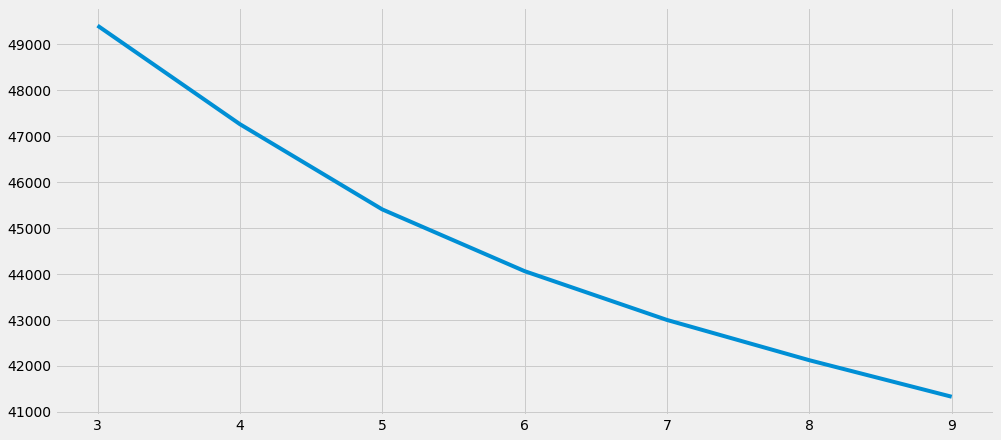

In [156]:
plt.rcParams['figure.figsize'] = (15,7)
plt.plot(range(3,10),wcss)
plt.show()

In [157]:
n_clusters = 6
clf = KMeans(n_clusters =n_clusters,
             max_iter = 100,
             init = 'k-means++',
             n_init =1)
labels = clf.fit_predict(vectors)

In [158]:
cluster0['dress_type'] = labels

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

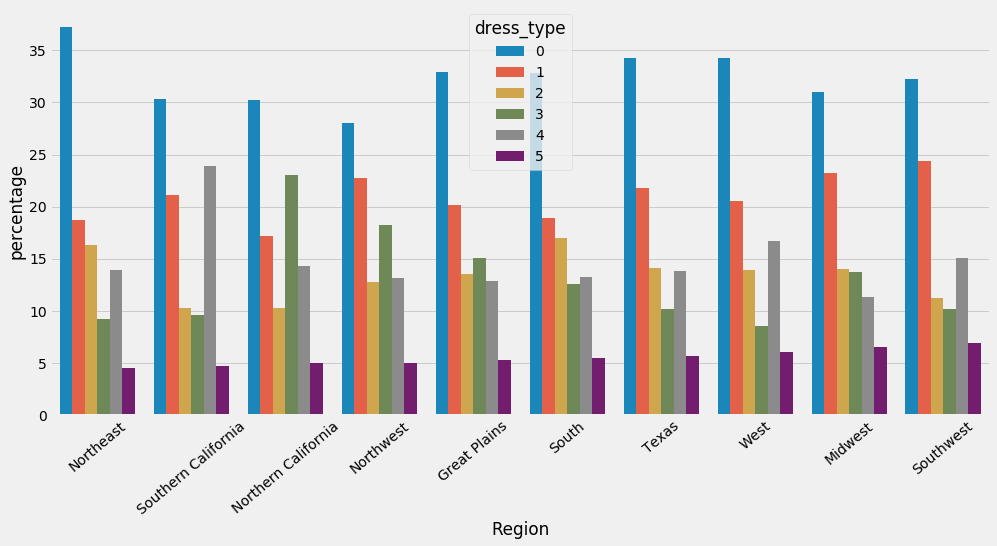

In [161]:
cluster_percents = (cluster0.groupby(['Region'])['dress_type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                    .sort_values('percentage')
                    )

p = sns.barplot(x="Region", y="percentage", hue="dress_type", data=cluster_percents)
plt.xticks(rotation=40)

### Dress type 0 : 80/90s floral or solid

In [163]:
mask = cluster0.dress_type == 0
type_zero = cluster0[mask]

In [165]:
dress_0 = []
for row in type_zero.tokenized:
    dress_0 = dress_0 + row

fdist = FreqDist(dress_0)
fdist = pd.Series(fdist, name='Frequency')
fdist.index.name = 'word'
fdist = fdist.reset_index()
fdist = pd.DataFrame(data=fdist)

fdist_sort = fdist.sort_values(['Frequency'], ascending = False)
fdist_sort.reset_index(drop=True, inplace=True)

fdist_sort.head(10)

,word,Frequency
0,dress,20962
1,black,4685
2,floral,3824
3,sleeve,2941
4,80s,2855
5,print,2717
6,white,2611
7,blue,2539
8,long,2518
9,90s,2395


### Dress type 1 : 60s/70s floral 

In [166]:
mask = cluster0.dress_type == 1
type_one = cluster0[mask]

dress_1 = []
for row in type_one.tokenized:
    dress_1 = dress_1 + row

fdist = FreqDist(dress_1)
fdist = pd.Series(fdist, name='Frequency')
fdist.index.name = 'word'
fdist = fdist.reset_index()
fdist = pd.DataFrame(data=fdist)

fdist_sort = fdist.sort_values(['Frequency'], ascending = False)
fdist_sort.reset_index(drop=True, inplace=True)

fdist_sort.head(10)

,word,Frequency
0,dress,25927
1,floral,3796
2,60s,2996
3,maxi,2879
4,70s,2567
5,1960s,2566
6,mod,2225
7,mini,2128
8,print,1777
9,1970s,1598


### Dress type 2 : actually skirts

In [167]:
mask = cluster0.dress_type == 2
type_two = cluster0[mask]

dress_2 = []
for row in type_two.tokenized:
    dress_2 = dress_2 + row

fdist = FreqDist(dress_2)
fdist = pd.Series(fdist, name='Frequency')
fdist.index.name = 'word'
fdist = fdist.reset_index()
fdist = pd.DataFrame(data=fdist)

fdist_sort = fdist.sort_values(['Frequency'], ascending = False)
fdist_sort.reset_index(drop=True, inplace=True)

fdist_sort.head(10)

,word,Frequency
0,skirt,13922
1,waist,2515
2,high,1992
3,plaid,1455
4,midi,1390
5,pleated,1294
6,wool,1287
7,floral,1279
8,pencil,1230
9,blue,1201


### Dress type 3: 50s 

In [169]:
mask = cluster0.dress_type == 3
type_three = cluster0[mask]

dress_3 = []
for row in type_three.tokenized:
    dress_3 = dress_3 + row

fdist = FreqDist(dress_3)
fdist = pd.Series(fdist, name='Frequency')
fdist.index.name = 'word'
fdist = fdist.reset_index()
fdist = pd.DataFrame(data=fdist)

fdist_sort = fdist.sort_values(['Frequency'], ascending = False)
fdist_sort.reset_index(drop=True, inplace=True)

fdist_sort.head(15)

,word,Frequency
0,dress,7332
1,1950s,3193
2,50s,2773
3,skirt,2456
4,cotton,2050
5,print,1716
6,floral,1463
7,blue,1383
8,day,1235
9,white,1054


### Dress type 4: "boho" floral hippie, some blouses

In [170]:
mask = cluster0.dress_type == 4
type_four = cluster0[mask]

dress_4 = []
for row in type_four.tokenized:
    dress_4 = dress_4 + row

fdist = FreqDist(dress_4)
fdist = pd.Series(fdist, name='Frequency')
fdist.index.name = 'word'
fdist = fdist.reset_index()
fdist = pd.DataFrame(data=fdist)

fdist_sort = fdist.sort_values(['Frequency'], ascending = False)
fdist_sort.reset_index(drop=True, inplace=True)

fdist_sort.head(15)

,word,Frequency
0,dress,5370
1,boho,3134
2,floral,2814
3,70s,2543
4,blouse,2451
5,hippie,2400
6,1970s,1818
7,maxi,1685
8,print,1564
9,top,1544


### Dress type 5: actually swimsuits

In [171]:
mask = cluster0.dress_type == 5
type_five = cluster0[mask]

dress_5 = []
for row in type_five.tokenized:
    dress_5 = dress_5 + row

fdist = FreqDist(dress_5)
fdist = pd.Series(fdist, name='Frequency')
fdist.index.name = 'word'
fdist = fdist.reset_index()
fdist = pd.DataFrame(data=fdist)

fdist_sort = fdist.sort_values(['Frequency'], ascending = False)
fdist_sort.reset_index(drop=True, inplace=True)

fdist_sort.head(15)

,word,Frequency
0,suit,1577
1,piece,1421
2,swimsuit,1265
3,romper,935
4,jumpsuit,897
5,one,793
6,floral,697
7,bathing,656
8,set,501
9,black,484


In [205]:
cluster0.dress_type = cluster0.dress_type.replace(0,'80s90s')
cluster0.dress_type = cluster0.dress_type.replace(1,'60s70s')
cluster0.dress_type = cluster0.dress_type.replace(2,'skirts')
cluster0.dress_type = cluster0.dress_type.replace(3,'40s50s60s')
cluster0.dress_type = cluster0.dress_type.replace(4,'bohohippie')
cluster0.dress_type = cluster0.dress_type.replace(5,'swimpieces')

#etsy = etsy.replace('Eastern US', 'Northeast')
#etsy = etsy.replace('Mid Atlantic', 'South')

In [207]:
cluster0.head()

,total_index,city_index,Description,Price,City,State,Region,lower,tokenized,description_length_cleaned,...,thirties,forties,fifties,sixties,seventies,eighties,nineties,vector,seven_cluster_assign,dress_type
0,0,0,Vintage Women's short sleeve dress with stagec...,24.0,Maine,Maine,Northeast,vintage women's short sleeve dress with stagec...,"[short, sleeve, dress, stagecoaches, flowers, ...",13,...,0,1,0,0,0,0,0,"[-0.14394530653953552, 0.11456135660409927, 0....",0,80s90s
12,12,12,1970's Striped Velour Surplice Neckline Sweate...,42.0,Maine,Maine,Northeast,1970's striped velour surplice neckline sweate...,"[1970, striped, velour, surplice, neckline, sw...",16,...,0,0,0,0,1,0,0,"[-0.06212715804576874, 0.1302027702331543, 0.1...",0,80s90s
15,15,15,Vintage 1970s Jessica’s Gunnies Prairie Skirt ...,48.0,Maine,Maine,Northeast,vintage 1970s jessica’s gunnies prairie skirt ...,"[1970s, jessica, ’, gunnies, prairie, skirt, f...",10,...,0,0,0,0,1,0,0,"[-0.3083146810531616, -0.03063587285578251, 0....",0,bohohippie
22,22,22,Vintage 1970's Peggy Jennings Pale Pink Silk 3...,148.0,Maine,Maine,Northeast,vintage 1970's peggy jennings pale pink silk 3...,"[1970, peggy, jennings, pale, pink, silk, 3, p...",9,...,0,0,0,0,1,0,0,"[-0.046376705169677734, 0.18348179757595062, 0...",0,80s90s
36,36,36,1940's Navy Rayon Dress with Celluloid Carved ...,56.0,Maine,Maine,Northeast,1940's navy rayon dress with celluloid carved ...,"[1940, navy, rayon, dress, celluloid, carved, ...",17,...,0,1,0,0,0,0,0,"[-0.2535940706729889, 0.22933444380760193, 0.4...",0,40s50s60s


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

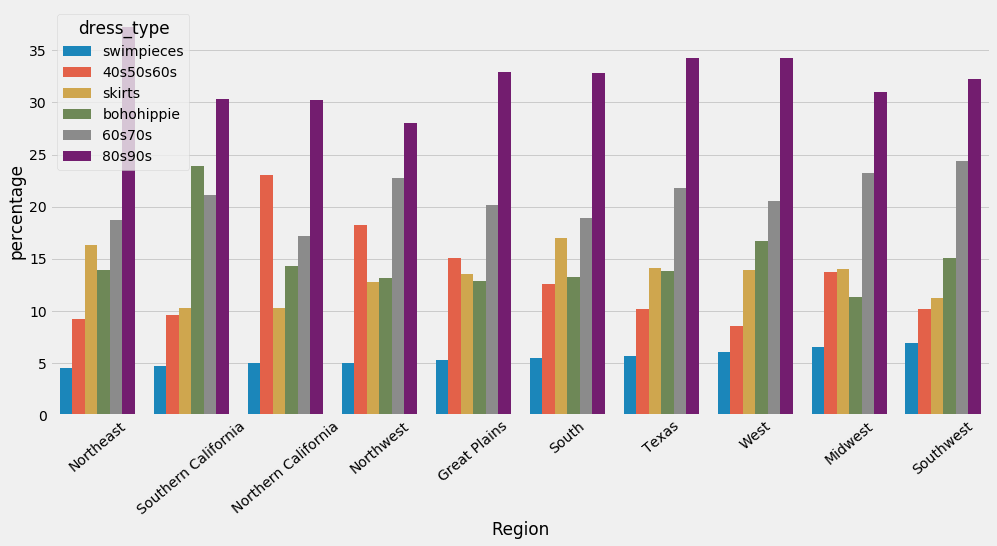

In [208]:
cluster_percents = (cluster0.groupby(['Region'])['dress_type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                    .sort_values('percentage')
                    )

p = sns.barplot(x="Region", y="percentage", hue="dress_type", data=cluster_percents)
plt.xticks(rotation=40)

Text(0.5,1,'Average Price of 40s-50s-60s Dress Group by Region')

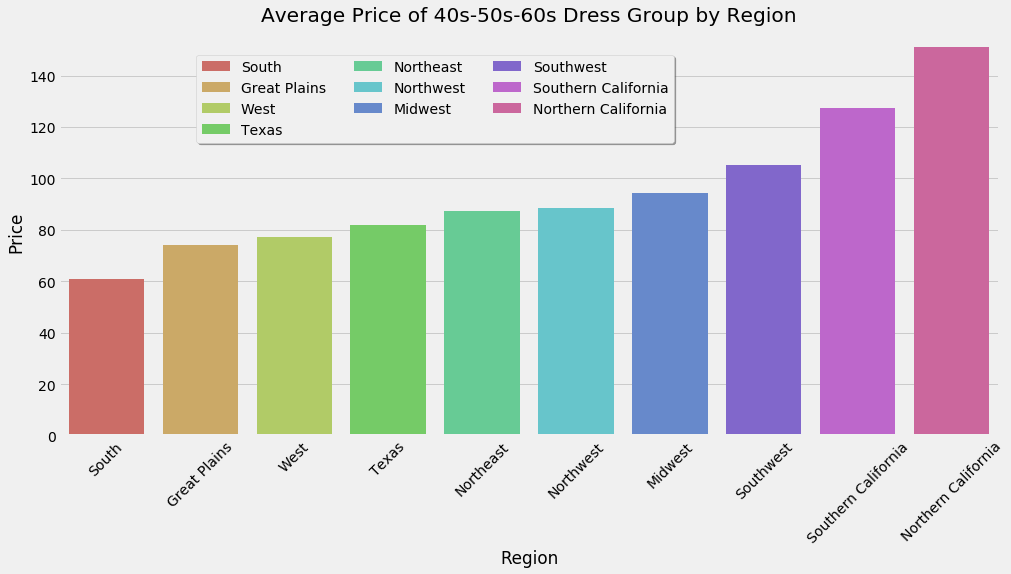

In [225]:
mask = cluster0.dress_type == '40s50s60s'


result = cluster0[mask].groupby(["Region"]).aggregate(np.mean).reset_index().sort_values('Price', ascending = True)


ax = sns.barplot(x="Region", y="Price", data=result, hue = 'Region', palette = 'hls',dodge = False)
plt.xticks(rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(.4, .95), shadow=True, ncol=3)
ax.set_title('Average Price of 40s-50s-60s Dress Group by Region')